#**TCS iON RIO125 – Automate extraction of handwritten text from an image.**



---



---


**Name Of The Student		:**	Saranya Rajagoplan

**Internship Project Title		:** Automate extraction of handwritten text from an image

**Name of the Organization	:** TCS iON

**Name of the Industry Mentor	:** Debashis Roy Sir

**Name of the Institute		:** ICT Academy of Kerala




---



---




## **Introduction:**
An optical character recognition problem is basically a type of image-based sequence recognition problem. And for sequence recognition problem, most suited neural networks are recurrent neural networks(RNN) while for an image-based problem most suited are convolution neural networks(CNN). To cop up with the OCR problems we need to combine both of these CNN and RNN and use SoftMax.

## **Steps being followed are as follows:**
The complete implementation of the project can be divided into the following major steps:

**1.	Collecting the Dataset.**

**2.	Uploading the dataset into the Google Drive.**

**3.	Preprocessing the data.**

**4.	Dividing the dataset into train, test and validation sets.**

**5.	Creating the defining the model/network architecture.**

**6.	Training the model.**

**7.	Saving the model.**

**8.	Testing the model.**

**9.	Prediction.**

**10.	Plotting the loss and accuracy plots.**


## **Step 1: Collecting the Dataset**
we used IAM handwritten datset. This is good dataset with several preprocessing already done.


In [1]:
from __future__ import division
import numpy as np
import os
import glob
from random import *
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
# %matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop
from google.colab import drive


## **Step 2: Uploading the Dataset on GDrive and acessing it.**

After uploading the dataset accessing the content stored in GDrive.

In [2]:
drive.mount('/content/gdrive')
d = {}
from subprocess import check_output
with open('/content/gdrive/MyDrive/rio/formss.txt') as f:
  for line in f:
    key = line.split(' ')[0]
    writer = line.split(' ')[1]
    d[key] = writer
print(len(d.keys()))

Mounted at /content/gdrive
1539


## **Step 3: Preprocessing the Data.**

After fetching the dataset we will preprocess the data.

In [3]:
tmp = []
target_list = []
path_to_files = os.path.join('/content/gdrive/MyDrive/rio/data_subset','*')
for filename in sorted(glob.glob(path_to_files)):
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    print(parts)
    form = parts[0] + '-' + parts[1]

    for key in d:
        if key == form:
            target_list.append(str(d[form]))

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
print(img_files)
print(img_targets)

['a01', '000u', 's00', '00']
['a01', '000u', 's00', '01']
['a01', '000u', 's00', '02']
['a01', '000u', 's00', '03']
['a01', '000u', 's01', '00']
['a01', '000u', 's01', '01']
['a01', '000u', 's01', '02']
['a01', '000u', 's01', '03']
['a01', '003u', 's00', '00']
['a01', '003u', 's00', '01']
['a01', '003u', 's00', '02']
['a01', '003u', 's00', '03']
['a01', '003u', 's01', '00']
['a01', '003u', 's01', '01']
['a01', '003u', 's01', '02']
['a01', '003u', 's01', '03']
['a01', '003u', 's01', '04']
['a01', '003u', 's02', '00']
['a01', '003u', 's02', '01']
['a01', '003u', 's02', '02']
['a01', '003u', 's02', '03']
['a01', '007u', 's00', '00']
['a01', '007u', 's00', '01']
['a01', '007u', 's01', '00']
['a01', '007u', 's01', '01']
['a01', '007u', 's01', '02']
['a01', '007u', 's01', '03']
['a01', '007u', 's01', '04']
['a01', '007u', 's02', '00']
['a01', '007u', 's02', '01']
['a01', '007u', 's02', '02']
['a01', '007u', 's02', '03']
['a01', '007u', 's02', '04']
['a01', '011u', 's00', '00']
['a01', '011u'

## **Visualising the Data**



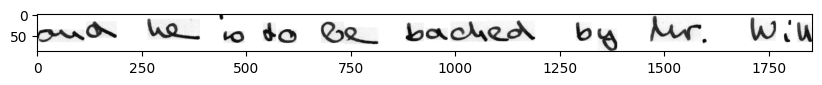

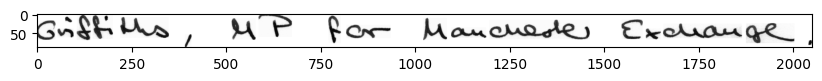

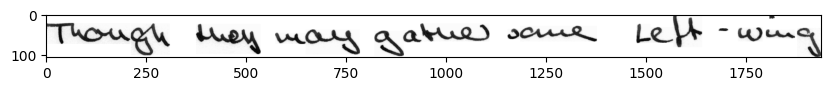

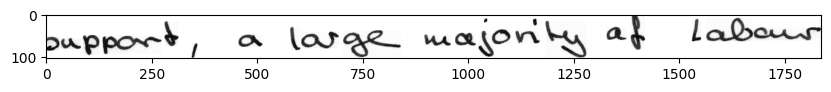

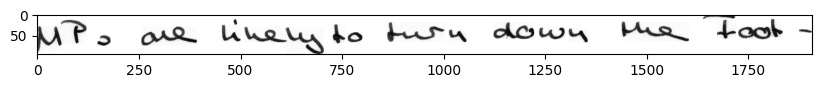

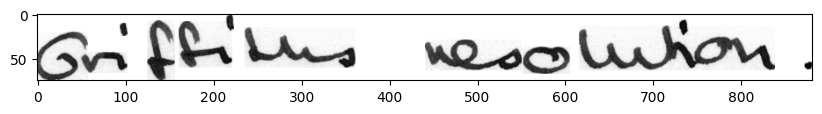

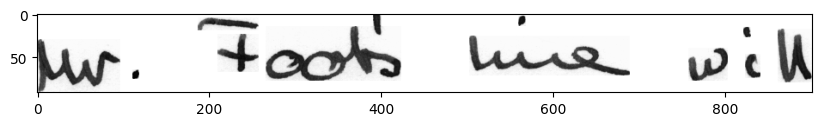

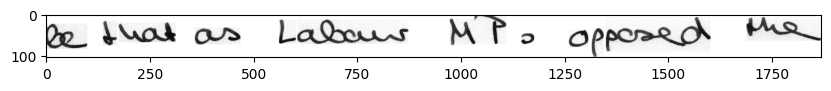

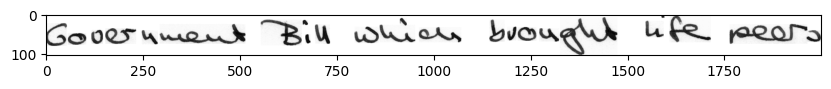

In [4]:
# Visualizing the data
for filename in img_files[6:15]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

In [5]:
# Label Encode writer names for one hot encoding later
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[6:15], img_targets[6:15], encoded_Y[6:15])

['/content/gdrive/MyDrive/rio/data_subset/a01-000u-s01-02.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-000u-s01-03.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s00-00.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s00-01.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s00-02.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s00-03.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s01-00.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s01-01.png'
 '/content/gdrive/MyDrive/rio/data_subset/a01-003u-s01-02.png'] ['000' '000' '000' '000' '000' '000' '000' '000' '000'] [0 0 0 0 0 0 0 0 0]


## **Step 4: Dividing the dataset into train, test and validation sets.**

After sptlitting we have 3240 train images, 835 test and validation images each.

In [6]:
#split into test train and validation in ratio 4:1:1

from sklearn.model_selection import train_test_split
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(3240,) (835,) (835,)
(3240,) (835,) (835,)


## **Generator Functions.**



In [7]:
batch_size = 16
num_classes = 50


def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates

        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = target_files[offset:offset+batch_size]

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample)
                cur_width = im.size[0]
                cur_height = im.size[1]


                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)
                now_width = imresize.size[0]
                now_height = imresize.size[1]


                avail_x_points = list(range(0, now_width - 113 ))


                pick_num = int(len(avail_x_points)*factor)


                random_startx = sample(avail_x_points,  pick_num)

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)


            X_train = np.array(images)
            y_train = np.array(targets)


            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)

            X_train = X_train.astype('float32')
            X_train /= 255


            y_train = to_categorical(y_train, num_classes)

            yield shuffle(X_train, y_train)

In [8]:
# Generate data for training and validation
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)

## **Step 5:	Creating the defining the model/network architecture.**

Adding the Pooling Layers, CNN Layers, Activation Functions, etc.

In [9]:
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize_images(image,[56,56])


row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))


#model.add(Lambda(resize_image))
#model.add(Lambda(lambda x: resize_image))


model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))

model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 115, 115, 1)       0         
 g2D)                                                            
                                                                 
 conv1 (Conv2D)              (None, 58, 58, 32)        832       
                                                                 
 activation (Activation)     (None, 58, 58, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 29, 29, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                        

## **Step 6: Training the model.**

Using 2 epochs of 3000 train samples and 280 val samples.

In [10]:
# Training the model

nb_epoch = 2

samples_per_epoch = 3000
nb_val_samples = 280



from keras.callbacks import ModelCheckpoint
filepath="gdrive/My Drive/check-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]


history_object = model.fit_generator(train_generator, steps_per_epoch= samples_per_epoch,
                                     validation_data=validation_generator,
                                     validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)


<ipython-input-10-04ff3b052ffd>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_object = model.fit_generator(train_generator, steps_per_epoch= samples_per_epoch,
<ipython-input-7-6e17d9ede78e>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)


Epoch 1/2
3000/3000 [==============================] - ETA: 0s - loss: 1.5550 - accuracy: 0.5595
Epoch 1: saving model to gdrive/My Drive/check-01-0.66.hdf5
3000/3000 [==============================] - 5014s 2s/step - loss: 1.5550 - accuracy: 0.5595 - val_loss: 0.6565 - val_accuracy: 0.7937
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3000/3000 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.8313
Epoch 2: saving model to gdrive/My Drive/check-02-0.38.hdf5
3000/3000 [==============================] - 3418s 1s/step - loss: 0.5453 - accuracy: 0.8313 - val_loss: 0.3840 - val_accuracy: 0.8853


## **Step 7: Saving the model.**

Saving the model using HDF5 file extension.

In [12]:
#Saving the model and weights into GDrive

from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("gdrive/My Drive/rio/HTR_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gdrive/My Drive/rio/HTR_model_weights.hdf5")
print("Saved model to GDrive")

Saved model to GDrive


In [13]:
#Loading json and weights to recover model
import tensorflow as tf
json_file = open("gdrive/My Drive/rio/HTR_Model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
l_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
l_model.load_weights("gdrive/My Drive/rio/HTR_model_weights.hdf5")
print("Loaded model from Gdrive")

Loaded model from Gdrive


In [14]:
model.save("gdrive/My Drive/rio/HTR_model.hdf5")
print("Saved Keras Model")

Saved Keras Model


In [15]:
#from keras.models import load_model
# load model
from tensorflow import keras
loaded_model = keras.models.load_model("gdrive/My Drive/rio/HTR_model.hdf5", custom_objects=None, compile=True, options=None)
print("Loaded the Keras Model")

Loaded the Keras Model


In [16]:
print(loaded_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 115, 115, 1)       0         
 g2D)                                                            
                                                                 
 conv1 (Conv2D)              (None, 58, 58, 32)        832       
                                                                 
 activation (Activation)     (None, 58, 58, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 29, 29, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                        

## **Step 8: Testing the model.**


In [17]:
#model.load_weights('gdrive/My Drive/check-04-0.2584.hdf5')
scores = loaded_model.evaluate_generator(test_generator,280)
print("Accuracy = ", scores[1], len(scores) )

<ipython-input-17-db7aa398be14>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = loaded_model.evaluate_generator(test_generator,280)
<ipython-input-7-6e17d9ede78e>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)


Accuracy =  0.8819802403450012 2


In [18]:
#model.load_weights('gdrive/My Drive/check-04-0.2584.hdf5')
scores = model.evaluate_generator(test_generator,280)
print("Accuracy = ", scores[1])

<ipython-input-18-766ac3b7921f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator,280)
<ipython-input-7-6e17d9ede78e>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)


Accuracy =  0.8823091983795166


## **Step 9: Prediction.**

Prediction being done on Test Files.

In [19]:
images = []
for filename in test_files[:50]:
    im = Image.open(filename)
    cur_width = im.size[0]
    cur_height = im.size[1]


    height_fac = 113 / cur_height

    new_width = int(cur_width * height_fac)
    size = new_width, 113

    imresize = im.resize((size), Image.ANTIALIAS)
    now_width = imresize.size[0]
    now_height = imresize.size[1]


    avail_x_points = list(range(0, now_width - 113 ))


    factor = 0.1
    pick_num = int(len(avail_x_points)*factor)

    random_startx = sample(avail_x_points,  pick_num)

    for start in random_startx:
        imcrop = imresize.crop((start, 0, start+113, 113))
        images.append(np.asarray(imcrop))

    X_test = np.array(images)

    X_test = X_test.reshape(X_test.shape[0], 113, 113, 1)

    X_test = X_test.astype('float32')
    X_test /= 255
    shuffle(X_test)

print(X_test.shape)

<ipython-input-19-e46091c452bb>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)


(6264, 113, 113, 1)


In [20]:
predictions = loaded_model.predict(X_test, verbose =1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
    predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))

196/196 [==============================] - 1s 3ms/step
(6264, 50)
6264


In [21]:
writer_number = 18
total_images =10
counter = 0
for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
        image = X_test[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap ='gray')

In [23]:
writer_number = 18
total_images =10
counter = 0
print("saranya")
for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
        image = X_test[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap ='gray')
        plt.show()

saranya


## **Step 10: Plotting the loss and accuracy plots.**


In [24]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [25]:
acc = history_object.history['accuracy']
val_acc = history_object.history['val_accuracy']
loss = history_object.history['loss']
val_loss = history_object.history['val_loss']
epochs = range(1,len(loss)+1)

## **Loss vs Epochs Graph**

It shows deacrease in loss over epochs.

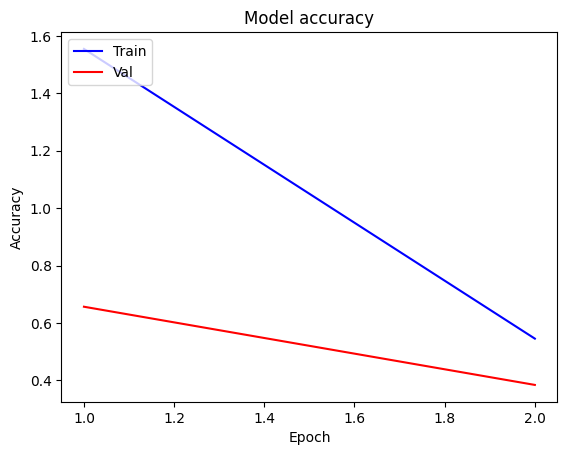

In [26]:
plotgraph(epochs, loss, val_loss)

## **Accuracy vs Epochs Graph**

It shows increase in accuracy over epochs.

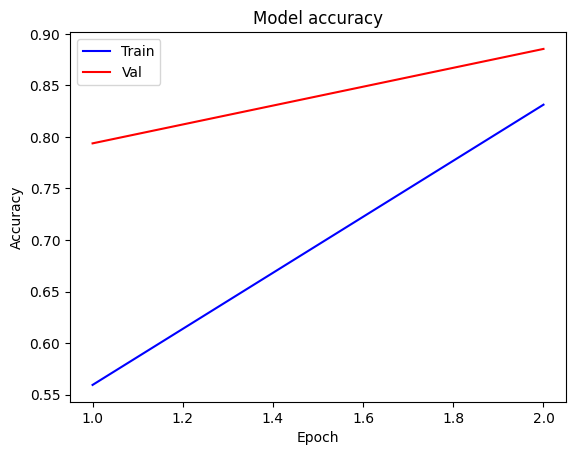

In [27]:
plotgraph(epochs, acc, val_acc)